# Exploratory Factor Analysis (EFA) Example

In [28]:
!pip3 install factor_analyzer

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from factor_analyzer import FactorAnalyzer



In [30]:
# Generate synthetic data for demonstration
np.random.seed(42)
n_samples = 300
n_features = 6
data, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=3, random_state=42)
columns = [f"Feature_{i}" for i in range(1, n_features + 1)]
df = pd.DataFrame(data, columns=columns)
df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
0,7.214362,-7.513981,-5.610159,-5.950751,-2.625402,1.168310
1,6.283531,-5.568537,-7.710627,-7.303524,-2.714741,-0.161766
2,6.475907,-4.041509,-7.735402,-7.945471,-2.443985,0.285805
3,-8.116656,6.194471,1.497780,4.650826,-10.810438,10.111195
4,-2.411522,8.241276,4.664389,2.471168,-5.428484,-5.920839


In [32]:
# Correlation matrix
print("\nCorrelation matrix:")
correlation_matrix = df.corr()
display(correlation_matrix)





Correlation matrix:


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
Feature_1,1.000000,-0.848050,-0.781193,-0.939900,0.929028,-0.436070
Feature_2,-0.848050,1.000000,0.960533,0.920513,-0.768234,-0.056571
Feature_3,-0.781193,0.960533,1.000000,0.879885,-0.702600,-0.158228
Feature_4,-0.939900,0.920513,0.879885,1.000000,-0.874543,0.232199
Feature_5,0.929028,-0.768234,-0.702600,-0.874543,1.000000,-0.471179
Feature_6,-0.436070,-0.056571,-0.158228,0.232199,-0.471179,1.000000


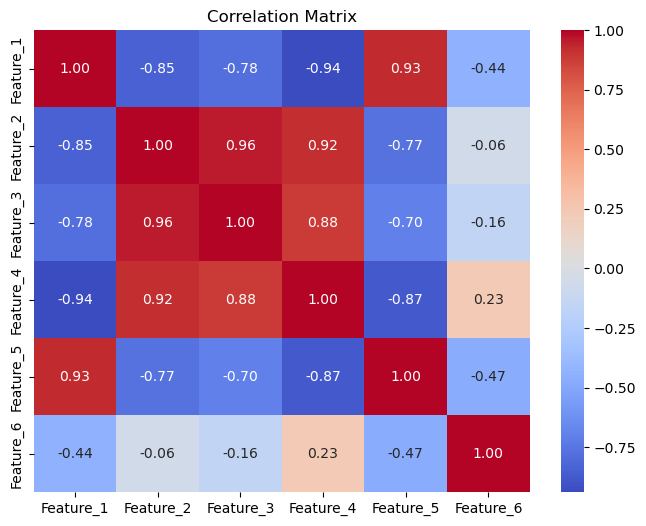

In [14]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



In [34]:

# Perform Factor Analysis
num_factors = 2
fa = FactorAnalyzer(n_factors=num_factors, rotation="varimax", method="principal")
fa.fit(df)



FactorAnalyzer(method='principal', n_factors=2, rotation='varimax',
               rotation_kwargs={})

In [36]:
# Extract and visualize factor loadings
loadings = pd.DataFrame(fa.loadings_, index=columns, columns=[f"Factor_{i+1}" for i in range(num_factors)])
print("\nFactor Loadings:")
display(loadings)




Factor Loadings:


,Factor_1,Factor_2
Feature_1,-0.891128,-0.427142
Feature_2,0.985948,-0.076837
Feature_3,0.968883,-0.185147
Feature_4,0.956445,0.216546
Feature_5,-0.828941,-0.489081
Feature_6,0.013898,0.992543


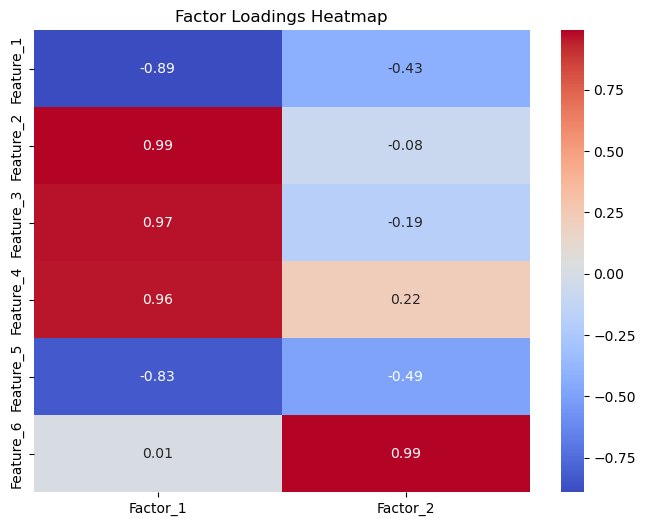

In [38]:
# Visualize factor loadings
plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Factor Loadings Heatmap")
plt.show()



In [40]:
# Variance explained by each factor
variance_explained = fa.get_factor_variance()
variance_df = pd.DataFrame(
    {
        "Variance Explained": variance_explained[1]
    },
    index=[f"Factor_{i+1}" for i in range(num_factors)]
)
print("\nVariance Explained by Factors:")
display(variance_df)




Variance Explained by Factors:


,Variance Explained
Factor_1,0.717843
Factor_2,0.248978
